# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [173]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [174]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [175]:
city_url = f"{url}appid={weather_api_key}&q={city.replace(' ', '%20')}"
city_weather = requests.get(city_url).json()
city_weather['clouds']['all']

94

In [176]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city.replace(' ', '%20')}"
    
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=kiruna
Processing Record 1 of Set 1 | kiruna
{'coord': {'lon': 20.2251, 'lat': 67.8557}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 280.66, 'feels_like': 279.39, 'temp_min': 280.66, 'temp_max': 280.66, 'pressure': 1005, 'humidity': 100}, 'visibility': 9000, 'wind': {'speed': 2.06, 'deg': 30}, 'clouds': {'all': 100}, 'dt': 1690068692, 'sys': {'type': 1, 'id': 1771, 'country': 'SE', 'sunrise': 1690070610, 'sunset': 1690147637}, 'timezone': 7200, 'id': 605155, 'name': 'Kiruna', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=carloforte
Processing Record 2 of Set 1 | carloforte
{'coord': {'lon': 8.3058, 'lat': 39.145}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}],

{'coord': {'lon': -36.5092, 'lat': -54.2811}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 266.29, 'feels_like': 260.24, 'temp_min': 266.29, 'temp_max': 266.29, 'pressure': 995, 'humidity': 68, 'sea_level': 995, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 4.24, 'deg': 242, 'gust': 4.25}, 'clouds': {'all': 39}, 'dt': 1690068693, 'sys': {'country': 'GS', 'sunrise': 1690021754, 'sunset': 1690050921}, 'timezone': -7200, 'id': 3426466, 'name': 'Grytviken', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=edinburgh%20of%20the%20seven%20seas
Processing Record 14 of Set 1 | edinburgh of the seven seas
{'coord': {'lon': -12.3116, 'lat': -37.0676}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 285.77, 'feels_like': 284.89, 'temp_min': 285.77, 'temp_max': 285.77, 

{'coord': {'lon': 86.9317, 'lat': 21.4942}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.63, 'feels_like': 304.88, 'temp_min': 300.63, 'temp_max': 300.63, 'pressure': 1004, 'humidity': 87, 'sea_level': 1004, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 4.29, 'deg': 129, 'gust': 8}, 'clouds': {'all': 59}, 'dt': 1690068694, 'sys': {'country': 'IN', 'sunrise': 1690069285, 'sunset': 1690116942}, 'timezone': 19800, 'id': 1277599, 'name': 'Balasore', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=iqaluit
Processing Record 27 of Set 1 | iqaluit
{'coord': {'lon': -68.5145, 'lat': 63.7506}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 280.76, 'feels_like': 280.76, 'temp_min': 280.76, 'temp_max': 281, 'pressure': 1013, 'humidity': 81}, 'visibility': 10000, 'wind

{'coord': {'lon': -169.9187, 'lat': -19.0595}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 300.09, 'feels_like': 302.23, 'temp_min': 300.09, 'temp_max': 300.09, 'pressure': 1009, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 290}, 'clouds': {'all': 12}, 'dt': 1690068695, 'sys': {'type': 1, 'id': 7306, 'country': 'NU', 'sunrise': 1690048287, 'sunset': 1690088427}, 'timezone': -39600, 'id': 4036284, 'name': 'Alofi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=longyearbyen
Processing Record 39 of Set 1 | longyearbyen
{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 282.06, 'feels_like': 280.3, 'temp_min': 282.06, 'temp_max': 282.06, 'pressure': 1018, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 3.

{'coord': {'lon': -76.7936, 'lat': 17.997}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 303.77, 'feels_like': 310.77, 'temp_min': 302.71, 'temp_max': 303.84, 'pressure': 1013, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 9.77, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1690068697, 'sys': {'type': 2, 'id': 2036521, 'country': 'JM', 'sunrise': 1690022525, 'sunset': 1690069487}, 'timezone': -18000, 'id': 3489854, 'name': 'Kingston', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=batyrevo
Processing Record 0 of Set 2 | batyrevo
{'coord': {'lon': 47.6111, 'lat': 55.0675}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 288.1, 'feels_like': 287.56, 'temp_min': 288.1, 'temp_max': 288.1, 'pressure': 1012, 'humidity': 73, 'sea_level': 1012, 'grnd_level': 1000}, 'visibilit

{'coord': {'lon': -84.5333, 'lat': 39.1834}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.03, 'feels_like': 300.63, 'temp_min': 298.14, 'temp_max': 301.29, 'pressure': 1011, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1690068599, 'sys': {'type': 2, 'id': 2005257, 'country': 'US', 'sunrise': 1690021766, 'sunset': 1690073961}, 'timezone': -14400, 'id': 4513583, 'name': 'Hamilton', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=fortuna
Processing Record 12 of Set 2 | fortuna
{'coord': {'lon': -124.1573, 'lat': 40.5982}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 294.21, 'feels_like': 294.15, 'temp_min': 291.34, 'temp_max': 296.44, 'pressure': 1015, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 29

{'coord': {'lon': 59.5289, 'lat': 22.5667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 302.52, 'feels_like': 306.1, 'temp_min': 302.52, 'temp_max': 302.52, 'pressure': 1001, 'humidity': 67, 'sea_level': 1001, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 3.05, 'deg': 125, 'gust': 3.19}, 'clouds': {'all': 100}, 'dt': 1690068700, 'sys': {'country': 'OM', 'sunrise': 1690075750, 'sunset': 1690123631}, 'timezone': 14400, 'id': 286245, 'name': 'Sur', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=arar
Processing Record 28 of Set 2 | arar
{'coord': {'lon': 41.0381, 'lat': 30.9753}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 306.16, 'feels_like': 303.77, 'temp_min': 306.16, 'temp_max': 306.16, 'pressure': 1006, 'humidity': 9}, 'visibility': 10000, 'wind': {'speed'

{'coord': {'lon': 55.7679, 'lat': -21.3585}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 291.92, 'feels_like': 292.33, 'temp_min': 291.92, 'temp_max': 291.92, 'pressure': 1026, 'humidity': 95, 'sea_level': 1026, 'grnd_level': 1020}, 'visibility': 170, 'wind': {'speed': 3.45, 'deg': 98, 'gust': 4.6}, 'rain': {'1h': 0.44}, 'clouds': {'all': 87}, 'dt': 1690068701, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1690080745, 'sunset': 1690120441}, 'timezone': 14400, 'id': 935215, 'name': 'Saint-Philippe', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=horta
Processing Record 43 of Set 2 | horta
{'coord': {'lon': -28.6333, 'lat': 38.5333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 293.16, 'feels_like': 293.41, 'temp_min': 293.16, 'temp_max': 293.16, 'pressure': 10

{'coord': {'lon': 33.3362, 'lat': 69.2551}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 282.71, 'feels_like': 279.28, 'temp_min': 282.71, 'temp_max': 282.71, 'pressure': 1009, 'humidity': 78, 'sea_level': 1009, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 7.87, 'deg': 77, 'gust': 8.6}, 'clouds': {'all': 100}, 'dt': 1690068702, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 10800, 'id': 562245, 'name': 'Gadzhiyevo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=san%20patricio
Processing Record 5 of Set 3 | san patricio
{'coord': {'lon': -97.5169, 'lat': 28.017}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 307.46, 'feels_like': 308.85, 'temp_min': 304.06, 'temp_max': 311.03, 'pressure': 1010, 'humidity': 39, 'sea_level': 1010, 'grnd_level

{'coord': {'lon': 24.8228, 'lat': 65.8596}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 286.02, 'feels_like': 285.97, 'temp_min': 286.02, 'temp_max': 286.02, 'pressure': 1002, 'humidity': 100}, 'visibility': 4700, 'wind': {'speed': 1.54, 'deg': 50}, 'clouds': {'all': 100}, 'dt': 1690068703, 'sys': {'type': 1, 'id': 1341, 'country': 'FI', 'sunrise': 1690072278, 'sunset': 1690143762}, 'timezone': 10800, 'id': 653257, 'name': 'Keminmaa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=taiohae
Processing Record 18 of Set 3 | taiohae
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=kirakira
Processing Record 19 of Set 3 | kirakira
{'coord': {'lon': 161.9205, 'lat': -10.4544}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': 

{'coord': {'lon': 34.9116, 'lat': 38.6304}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.29, 'feels_like': 294.92, 'temp_min': 295.29, 'temp_max': 295.29, 'pressure': 1015, 'humidity': 52, 'sea_level': 1015, 'grnd_level': 897}, 'visibility': 10000, 'wind': {'speed': 2.53, 'deg': 337, 'gust': 2.74}, 'clouds': {'all': 0}, 'dt': 1690068704, 'sys': {'type': 1, 'id': 6964, 'country': 'TR', 'sunrise': 1690079620, 'sunset': 1690131578}, 'timezone': 10800, 'id': 303831, 'name': 'Urgup', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=at%20taraf
Processing Record 34 of Set 3 | at taraf
{'coord': {'lon': 49.725, 'lat': 25.3628}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 306.45, 'feels_like': 304.01, 'temp_min': 306.45, 'temp_max': 306.45, 'pressure': 1000, 'humidity': 11, 'sea_level':

{'coord': {'lon': 150.1429, 'lat': -5.5502}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.53, 'feels_like': 306.12, 'temp_min': 302.53, 'temp_max': 302.53, 'pressure': 1010, 'humidity': 67, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.44, 'deg': 156, 'gust': 7}, 'clouds': {'all': 96}, 'dt': 1690068705, 'sys': {'country': 'PG', 'sunrise': 1690056621, 'sunset': 1690099264}, 'timezone': 36000, 'id': 2093967, 'name': 'Kimbe', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=sidi%20ifni
Processing Record 48 of Set 3 | sidi ifni
{'coord': {'lon': -10.173, 'lat': 29.3797}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.01, 'feels_like': 295.58, 'temp_min': 295.01, 'temp_max': 295.01, 'pressure': 1014, 'humidity': 89, 'sea_level': 1014, 'grnd

{'coord': {'lon': 150.7967, 'lat': -2.5744}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 301.47, 'feels_like': 305.89, 'temp_min': 301.47, 'temp_max': 301.47, 'pressure': 1009, 'humidity': 79, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.57, 'deg': 144, 'gust': 5.14}, 'rain': {'1h': 0.72}, 'clouds': {'all': 97}, 'dt': 1690068706, 'sys': {'country': 'PG', 'sunrise': 1690056201, 'sunset': 1690099370}, 'timezone': 36000, 'id': 2094342, 'name': 'Kavieng', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=kuching
Processing Record 11 of Set 4 | kuching
{'coord': {'lon': 110.3333, 'lat': 1.55}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 299.92, 'feels_like': 302.8, 'temp_min': 298.27, 'temp_max': 301.51, 'pressure': 1011, 'humidity': 85}, 'vis

{'coord': {'lon': 101.4542, 'lat': 47.475}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 285.4, 'feels_like': 285.16, 'temp_min': 285.4, 'temp_max': 285.4, 'pressure': 1011, 'humidity': 95, 'sea_level': 1011, 'grnd_level': 828}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 180, 'gust': 3}, 'clouds': {'all': 100}, 'dt': 1690068707, 'sys': {'country': 'MN', 'sunrise': 1690062009, 'sunset': 1690117247}, 'timezone': 28800, 'id': 2028606, 'name': 'Cecerleg', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=labuan
Processing Record 24 of Set 4 | labuan
{'coord': {'lon': 115.2417, 'lat': 5.2767}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 298.2, 'feels_like': 299.22, 'temp_min': 298.2, 'temp_max': 298.35, 'pressure': 1011, 'humidity': 94}, 'visibility': 10000, 'wind': {'s

{'coord': {'lon': -107.8014, 'lat': 50.2834}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 304.6, 'feels_like': 303.26, 'temp_min': 304.6, 'temp_max': 304.6, 'pressure': 1012, 'humidity': 29}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 80, 'gust': 9.26}, 'clouds': {'all': 20}, 'dt': 1690068708, 'sys': {'type': 1, 'id': 996, 'country': 'CA', 'sunrise': 1690025137, 'sunset': 1690081760}, 'timezone': -21600, 'id': 6160603, 'name': 'Swift Current', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=borovskoy
Processing Record 36 of Set 4 | borovskoy
{'coord': {'lon': 64.15, 'lat': 53.8}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 289.55, 'feels_like': 289.73, 'temp_min': 289.55, 'temp_max': 289.55, 'pressure': 1009, 'humidity': 95, 'sea_level': 1009, 'grnd_level': 989}

{'coord': {'lon': 57.2244, 'lat': 65.1472}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 286.64, 'feels_like': 286.58, 'temp_min': 286.64, 'temp_max': 286.64, 'pressure': 1001, 'humidity': 97, 'sea_level': 1001, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 2.31, 'deg': 207, 'gust': 4.65}, 'clouds': {'all': 60}, 'dt': 1690068709, 'sys': {'country': 'RU', 'sunrise': 1690065187, 'sunset': 1690135300}, 'timezone': 10800, 'id': 511794, 'name': 'Pechora', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=puqi
Processing Record 48 of Set 4 | puqi
{'coord': {'lon': 113.8833, 'lat': 29.7167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.98, 'feels_like': 305.27, 'temp_min': 300.98, 'temp_max': 300.98, 'pressure': 1007, 'humidity': 83, 'sea_level': 1007, 'grnd_level

{'coord': {'lon': 173.1241, 'lat': 1.3673}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 302.13, 'feels_like': 308.73, 'temp_min': 302.13, 'temp_max': 302.13, 'pressure': 1010, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1690068710, 'sys': {'type': 1, 'id': 7300, 'country': 'KI', 'sunrise': 1690050493, 'sunset': 1690094360}, 'timezone': 43200, 'id': 7601774, 'name': 'Bikenibeu Village', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=mossel%20bay
Processing Record 13 of Set 5 | mossel bay
{'coord': {'lon': 22.146, 'lat': -34.1831}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 280.11, 'feels_like': 277.12, 'temp_min': 280.11, 'temp_max': 280.11, 'pressure': 1022, 'humidity': 82, 'sea_level': 1022, 'grnd_leve

{'coord': {'lon': -152.4072, 'lat': 57.79}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 284.88, 'feels_like': 284.25, 'temp_min': 284.88, 'temp_max': 284.88, 'pressure': 1016, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1690068711, 'sys': {'type': 1, 'id': 7668, 'country': 'US', 'sunrise': 1690033452, 'sunset': 1690094856}, 'timezone': -28800, 'id': 5866583, 'name': 'Saint Paul Harbor', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=sandnessjoen
Processing Record 29 of Set 5 | sandnessjoen
{'coord': {'lon': 12.6316, 'lat': 66.0217}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.44, 'feels_like': 286.23, 'temp_min': 286.22, 'temp_max': 286.44, 'pressure': 1005, 'humidity': 92, 'sea_level': 1005, 'grnd_level': 1

{'coord': {'lon': 38.216, 'lat': 30.4999}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 301.91, 'feels_like': 300.94, 'temp_min': 301.91, 'temp_max': 301.91, 'pressure': 1007, 'humidity': 32, 'sea_level': 1007, 'grnd_level': 947}, 'visibility': 10000, 'wind': {'speed': 5.62, 'deg': 322, 'gust': 10}, 'clouds': {'all': 1}, 'dt': 1690068712, 'sys': {'country': 'SA', 'sunrise': 1690079956, 'sunset': 1690129656}, 'timezone': 10800, 'id': 101631, 'name': 'Ţubarjal', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=wajir
Processing Record 42 of Set 5 | wajir
{'coord': {'lon': 40.0573, 'lat': 1.7471}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.8, 'feels_like': 297.1, 'temp_min': 296.8, 'temp_max': 296.8, 'pressure': 1017, 'humidity': 72, 'sea_level': 1017, 'grnd_level': 987}, '

{'coord': {'lon': 18.3898, 'lat': 59.3268}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 286.96, 'feels_like': 286.54, 'temp_min': 286.22, 'temp_max': 288.14, 'pressure': 1005, 'humidity': 82, 'sea_level': 1005, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 2.68, 'deg': 256, 'gust': 6.7}, 'rain': {'1h': 0.12}, 'clouds': {'all': 97}, 'dt': 1690068713, 'sys': {'type': 2, 'id': 2037710, 'country': 'SE', 'sunrise': 1690078256, 'sunset': 1690140872}, 'timezone': 7200, 'id': 2709628, 'name': 'Gustavsberg', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=thunder%20bay
Processing Record 5 of Set 6 | thunder bay
{'coord': {'lon': -89.3168, 'lat': 48.4001}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 296.1, 'feels_like': 296.02, 'temp_min': 295.14, 'temp_max': 296.1, 'pre

{'coord': {'lon': 119.5181, 'lat': 39.8222}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 298.78, 'feels_like': 299.2, 'temp_min': 298.78, 'temp_max': 298.78, 'pressure': 1004, 'humidity': 69, 'sea_level': 1004, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 1.52, 'deg': 255, 'gust': 1.6}, 'clouds': {'all': 2}, 'dt': 1690068714, 'sys': {'country': 'CN', 'sunrise': 1690059113, 'sunset': 1690111473}, 'timezone': 28800, 'id': 1816753, 'name': 'Beidaihehaibin', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=labrador%20city
Processing Record 19 of Set 6 | labrador city
{'coord': {'lon': -66.9114, 'lat': 52.9463}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 291.1, 'feels_like': 291.41, 'temp_min': 291.1, 'temp_max': 291.1, 'pressure': 1011, 'humidity': 94}, 'visibility'

{'coord': {'lon': 118.8885, 'lat': -2.6748}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.36, 'feels_like': 303.05, 'temp_min': 300.36, 'temp_max': 300.36, 'pressure': 1013, 'humidity': 77, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 3.95, 'deg': 70, 'gust': 3.6}, 'clouds': {'all': 69}, 'dt': 1690068715, 'sys': {'country': 'ID', 'sunrise': 1690063868, 'sunset': 1690107020}, 'timezone': 28800, 'id': 1636556, 'name': 'Mamuju', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=hailey
Processing Record 32 of Set 6 | hailey
{'coord': {'lon': -114.3153, 'lat': 43.5196}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 306.99, 'feels_like': 304.72, 'temp_min': 304.81, 'temp_max': 308.04, 'pressure': 1013, 'humidity': 17}, 'visibility': 10000, 'wind': 

{'coord': {'lon': 20.8324, 'lat': 13.8292}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.67, 'feels_like': 299.11, 'temp_min': 298.67, 'temp_max': 298.67, 'pressure': 1014, 'humidity': 70, 'sea_level': 1014, 'grnd_level': 953}, 'visibility': 10000, 'wind': {'speed': 9.62, 'deg': 179, 'gust': 11.9}, 'clouds': {'all': 100}, 'dt': 1690068716, 'sys': {'country': 'TD', 'sunrise': 1690085915, 'sunset': 1690132041}, 'timezone': 3600, 'id': 245785, 'name': 'Abéché', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=north%20bend
Processing Record 44 of Set 6 | north bend
{'coord': {'lon': -124.2243, 'lat': 43.4065}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 292.56, 'feels_like': 292.57, 'temp_min': 290.41, 'temp_max': 300.51, 'pressure': 1018, 'humidity': 77}, 'visibility': 1000

{'coord': {'lon': -17.9293, 'lat': 28.629}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.45, 'feels_like': 295.85, 'temp_min': 295.45, 'temp_max': 296.69, 'pressure': 1017, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 8.75, 'deg': 20}, 'clouds': {'all': 100}, 'dt': 1690068717, 'sys': {'type': 2, 'id': 2002582, 'country': 'ES', 'sunrise': 1690093664, 'sunset': 1690142898}, 'timezone': 3600, 'id': 6534196, 'name': 'Tazacorte', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=mahad
Processing Record 8 of Set 7 | mahad
{'coord': {'lon': 73.4167, 'lat': 18.0833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.76, 'feels_like': 299.86, 'temp_min': 298.76, 'temp_max': 298.76, 'pressure': 1004, 'humidity': 95, 'sea_level': 1004, 'grnd_level': 1003}, 'visibilit

{'coord': {'lon': 169.8474, 'lat': 11.2278}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 301.38, 'feels_like': 304.86, 'temp_min': 301.38, 'temp_max': 301.38, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.87, 'deg': 79, 'gust': 8.43}, 'clouds': {'all': 37}, 'dt': 1690068718, 'sys': {'country': 'MH', 'sunrise': 1690050389, 'sunset': 1690096037}, 'timezone': 43200, 'id': 7306518, 'name': 'Utrik', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=andovoranto
Processing Record 21 of Set 7 | andovoranto
{'coord': {'lon': 49.1, 'lat': -18.95}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 290.69, 'feels_like': 291.03, 'temp_min': 290.69, 'temp_max': 290.69, 'pressure': 1023, 'humidity': 97, 'sea_level': 10

{'coord': {'lon': 151.7765, 'lat': -32.9272}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 283.14, 'feels_like': 280.49, 'temp_min': 282.02, 'temp_max': 285.77, 'pressure': 1022, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 300}, 'rain': {'1h': 0.89}, 'clouds': {'all': 100}, 'dt': 1690068720, 'sys': {'type': 2, 'id': 2009459, 'country': 'AU', 'sunrise': 1690059003, 'sunset': 1690096098}, 'timezone': 36000, 'id': 2155472, 'name': 'Newcastle', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=happy%20valley-goose%20bay
Processing Record 35 of Set 7 | happy valley-goose bay
{'coord': {'lon': -60.3315, 'lat': 53.3168}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 294.32, 'feels_like': 294.66, 'temp_min': 294.32, 'temp_max': 294.32, 'pressure': 101

{'coord': {'lon': 78.7, 'lat': 67.4667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 287.61, 'feels_like': 287.57, 'temp_min': 287.61, 'temp_max': 287.61, 'pressure': 1000, 'humidity': 94, 'sea_level': 1000, 'grnd_level': 997}, 'visibility': 3382, 'wind': {'speed': 2.4, 'deg': 272, 'gust': 3.36}, 'clouds': {'all': 73}, 'dt': 1690068722, 'sys': {'country': 'RU', 'sunrise': 1690057207, 'sunset': 1690132971}, 'timezone': 18000, 'id': 1489853, 'name': 'Tazovsky', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=abou%20el%20hassan
Processing Record 49 of Set 7 | abou el hassan
{'coord': {'lon': 1.1962, 'lat': 36.4166}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 306.84, 'feels_like': 313.84, 'temp_min': 306.84, 'temp_max': 306.84, 'pressure': 1014, 'humidity': 78, 'sea_level'

{'coord': {'lon': -35.1478, 'lat': -8.8978}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.25, 'feels_like': 297.73, 'temp_min': 297.25, 'temp_max': 297.25, 'pressure': 1020, 'humidity': 77, 'sea_level': 1020, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 5.84, 'deg': 130, 'gust': 9.3}, 'clouds': {'all': 52}, 'dt': 1690068724, 'sys': {'country': 'BR', 'sunrise': 1690014993, 'sunset': 1690057029}, 'timezone': -10800, 'id': 3388456, 'name': 'São José da Coroa Grande', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=taoudenni
Processing Record 12 of Set 8 | taoudenni
{'coord': {'lon': -3.9836, 'lat': 22.6783}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 309.86, 'feels_like': 309.18, 'temp_min': 309.86, 'temp_max': 309.86, 'pressure': 1009, 'humidity': 25

{'coord': {'lon': -5.72, 'lat': 29.82}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 307, 'feels_like': 304.48, 'temp_min': 307, 'temp_max': 307, 'pressure': 1011, 'humidity': 10, 'sea_level': 1011, 'grnd_level': 952}, 'visibility': 10000, 'wind': {'speed': 2.53, 'deg': 128, 'gust': 2.75}, 'clouds': {'all': 4}, 'dt': 1690068725, 'sys': {'country': 'MA', 'sunrise': 1690090589, 'sunset': 1690140112}, 'timezone': 3600, 'id': 2565267, 'name': 'Mhamid', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=mazagao
Processing Record 26 of Set 8 | mazagao
{'coord': {'lon': -51.2894, 'lat': -0.115}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 302.18, 'feels_like': 307.76, 'temp_min': 302.18, 'temp_max': 302.18, 'pressure': 1014, 'humidity': 79, 'sea_level': 1014, 'grnd_level': 1013}, 'visi

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=thabazimbi
Processing Record 41 of Set 8 | thabazimbi
{'coord': {'lon': 27.4116, 'lat': -24.5917}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.92, 'feels_like': 283.14, 'temp_min': 283.92, 'temp_max': 283.92, 'pressure': 1026, 'humidity': 80, 'sea_level': 1026, 'grnd_level': 913}, 'visibility': 10000, 'wind': {'speed': 2.19, 'deg': 38, 'gust': 2.3}, 'clouds': {'all': 3}, 'dt': 1690068727, 'sys': {'country': 'ZA', 'sunrise': 1690087883, 'sunset': 1690126915}, 'timezone': 7200, 'id': 949683, 'name': 'Thabazimbi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=hyesan-dong
Processing Record 42 of Set 8 | hyesan-dong
{'coord': {'lon': 128.1787, 'lat': 41.3976}, 'weather': [{'id': 804, 'main': 'Clouds

{'coord': {'lon': -6.7746, 'lat': 32.9005}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 292.95, 'feels_like': 292.74, 'temp_min': 292.95, 'temp_max': 292.95, 'pressure': 1016, 'humidity': 67, 'sea_level': 1016, 'grnd_level': 922}, 'visibility': 10000, 'wind': {'speed': 4.83, 'deg': 11, 'gust': 6}, 'clouds': {'all': 67}, 'dt': 1690068729, 'sys': {'country': 'MA', 'sunrise': 1690090450, 'sunset': 1690140757}, 'timezone': 3600, 'id': 6546693, 'name': 'Boujniba', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=isafjordur
Processing Record 5 of Set 9 | isafjordur
{'coord': {'lon': -23.124, 'lat': 66.0755}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 284.51, 'feels_like': 283.79, 'temp_min': 284.51, 'temp_max': 284.51, 'pressure': 1016, 'humidity': 80, 'sea_level': 1016, 'g

{'coord': {'lon': 89.1667, 'lat': 42.9333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 307.59, 'feels_like': 305.48, 'temp_min': 307.59, 'temp_max': 307.59, 'pressure': 1005, 'humidity': 19, 'sea_level': 1005, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 74, 'gust': 5.43}, 'clouds': {'all': 99}, 'dt': 1690068730, 'sys': {'country': 'CN', 'sunrise': 1690065867, 'sunset': 1690119287}, 'timezone': 28800, 'id': 1529114, 'name': 'Turpan', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=nadi
Processing Record 20 of Set 9 | nadi
{'coord': {'lon': 177.4167, 'lat': -17.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.15, 'feels_like': 299.15, 'temp_min': 299.15, 'temp_max': 299.15, 'pressure': 1012, 'humidity': 53}, 'visibility': 10000, 'wind': 

{'coord': {'lon': -54.1069, 'lat': -31.3314}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.05, 'feels_like': 295.12, 'temp_min': 295.05, 'temp_max': 295.05, 'pressure': 1011, 'humidity': 70, 'sea_level': 1011, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 9.57, 'deg': 4, 'gust': 18.9}, 'clouds': {'all': 69}, 'dt': 1690068731, 'sys': {'country': 'BR', 'sunrise': 1690021831, 'sunset': 1690059292}, 'timezone': -10800, 'id': 3471196, 'name': 'Bagé', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=turkmenbasy
Processing Record 35 of Set 9 | turkmenbasy
{'coord': {'lon': 52.9552, 'lat': 40.0222}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 297.58, 'feels_like': 297.38, 'temp_min': 297.58, 'temp_max': 297.58, 'pressure': 1010, 'humidity': 50}, 'visibility': 10000, '

{'coord': {'lon': -119.2691, 'lat': 50.2581}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 308.66, 'feels_like': 306.42, 'temp_min': 307.35, 'temp_max': 309.22, 'pressure': 1008, 'humidity': 17}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 310}, 'clouds': {'all': 23}, 'dt': 1690068733, 'sys': {'type': 2, 'id': 2018595, 'country': 'CA', 'sunrise': 1690027898, 'sunset': 1690084503}, 'timezone': -25200, 'id': 6173864, 'name': 'Vernon', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=greenville
Processing Record 48 of Set 9 | greenville
{'coord': {'lon': -77.3663, 'lat': 35.6127}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 296.28, 'feels_like': 297.26, 'temp_min': 296.12, 'temp_max': 300.17, 'pressure': 1011, 'humidity': 100}, 'visibility': 8047, 'wind': {'speed': 4.12, 

{'coord': {'lon': 119.1012, 'lat': 50.3691}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 287.52, 'feels_like': 287.52, 'temp_min': 287.52, 'temp_max': 287.52, 'pressure': 1009, 'humidity': 96, 'sea_level': 1009, 'grnd_level': 949}, 'visibility': 10000, 'wind': {'speed': 3.59, 'deg': 10, 'gust': 6.8}, 'clouds': {'all': 100}, 'dt': 1690068734, 'sys': {'country': 'RU', 'sunrise': 1690057087, 'sunset': 1690113698}, 'timezone': 32400, 'id': 2017646, 'name': 'Priargunsk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=i-n-salah
Processing Record 11 of Set 10 | i-n-salah
{'coord': {'lon': 2.4607, 'lat': 27.1935}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 309.81, 'feels_like': 306.98, 'temp_min': 309.81, 'temp_max': 309.81, 'pressure': 1010, 'humidity': 10, 'sea_level': 1010, '

{'coord': {'lon': 135.6, 'lat': 62.6667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 292.34, 'feels_like': 291.86, 'temp_min': 292.34, 'temp_max': 292.34, 'pressure': 1005, 'humidity': 59, 'sea_level': 1005, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 1.8, 'deg': 213, 'gust': 2.42}, 'clouds': {'all': 19}, 'dt': 1690068735, 'sys': {'country': 'RU', 'sunrise': 1690048256, 'sunset': 1690114610}, 'timezone': 32400, 'id': 2022773, 'name': 'Khandyga', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=vydrino
Processing Record 24 of Set 10 | vydrino
{'coord': {'lon': 104.8461, 'lat': 51.485}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 284.12, 'feels_like': 283.65, 'temp_min': 284.12, 'temp_max': 284.12, 'pressure': 1010, 'humidity': 91, 'sea_level': 1010, 'grnd_lev

{'coord': {'lon': 3.9054, 'lat': 46.4154}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 287.84, 'feels_like': 287.38, 'temp_min': 287.41, 'temp_max': 287.84, 'pressure': 1017, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1690068736, 'sys': {'type': 1, 'id': 6499, 'country': 'FR', 'sunrise': 1690085666, 'sunset': 1690140415}, 'timezone': 7200, 'id': 2980080, 'name': 'Saint-François', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=bartica
Processing Record 36 of Set 10 | bartica
{'coord': {'lon': -58.6167, 'lat': 6.4}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 301.33, 'feels_like': 308.33, 'temp_min': 301.33, 'temp_max': 301.33, 'pressure': 1014, 'humidity': 97, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility':

{'coord': {'lon': 112.4714, 'lat': 63.0128}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 296.6, 'feels_like': 296.31, 'temp_min': 296.6, 'temp_max': 296.6, 'pressure': 1010, 'humidity': 50, 'sea_level': 1010, 'grnd_level': 968}, 'visibility': 10000, 'wind': {'speed': 1.64, 'deg': 229, 'gust': 2.6}, 'clouds': {'all': 13}, 'dt': 1690068738, 'sys': {'country': 'RU', 'sunrise': 1690053586, 'sunset': 1690120381}, 'timezone': 32400, 'id': 2025456, 'name': 'Chernyshevskiy', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=parabel'
Processing Record 48 of Set 10 | parabel'
{'coord': {'lon': 81.4825, 'lat': 58.6978}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 290.32, 'feels_like': 290.57, 'temp_min': 290.32, 'temp_max': 290.32, 'pressure': 1005, 'humidity': 95, 'sea_level': 1005, 'grnd_

{'coord': {'lon': 143.5544, 'lat': -35.3378}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 283.46, 'feels_like': 282.24, 'temp_min': 283.46, 'temp_max': 283.46, 'pressure': 1027, 'humidity': 65, 'sea_level': 1027, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 3.2, 'deg': 204, 'gust': 4.88}, 'clouds': {'all': 100}, 'dt': 1690068739, 'sys': {'country': 'AU', 'sunrise': 1690061287, 'sunset': 1690097760}, 'timezone': 36000, 'id': 2147756, 'name': 'Swan Hill', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=colac
Processing Record 13 of Set 11 | colac
{'coord': {'lon': 143.5833, 'lat': -38.3333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 282.13, 'feels_like': 280.11, 'temp_min': 281.53, 'temp_max': 282.13, 'pressure': 1027, 'humidity': 73, 'sea_level': 102

{'coord': {'lon': -74.0643, 'lat': 40.3471}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.62, 'feels_like': 300.96, 'temp_min': 298.24, 'temp_max': 302.09, 'pressure': 1009, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1690068741, 'sys': {'type': 2, 'id': 2004370, 'country': 'US', 'sunrise': 1690019062, 'sunset': 1690071640}, 'timezone': -14400, 'id': 5103159, 'name': 'Red Bank', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=kirkwall
Processing Record 27 of Set 11 | kirkwall
{'coord': {'lon': -2.9587, 'lat': 58.9848}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 284.18, 'feels_like': 283.61, 'temp_min': 284.18, 'temp_max': 284.18, 'pressure': 1008, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 60

{'coord': {'lon': 80.3167, 'lat': 13.2167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 300.97, 'feels_like': 305.24, 'temp_min': 300.2, 'temp_max': 300.97, 'pressure': 1006, 'humidity': 83, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 5.65, 'deg': 235, 'gust': 10.5}, 'rain': {'1h': 0.6}, 'clouds': {'all': 100}, 'dt': 1690068744, 'sys': {'type': 2, 'id': 2012809, 'country': 'IN', 'sunrise': 1690071694, 'sunset': 1690117709}, 'timezone': 19800, 'id': 1267433, 'name': 'Kattivākkam', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=parry%20sound
Processing Record 40 of Set 11 | parry sound
{'coord': {'lon': -80.033, 'lat': 45.3501}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 296.18, 'feels_like': 295.82, 'temp_min': 296.18, 'temp_max': 296.18, 'pr

{'coord': {'lon': -8.3327, 'lat': 40.1629}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.82, 'feels_like': 291.12, 'temp_min': 290.82, 'temp_max': 290.82, 'pressure': 1018, 'humidity': 95, 'sea_level': 1018, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 1.2, 'deg': 324, 'gust': 3.8}, 'clouds': {'all': 0}, 'dt': 1690068745, 'sys': {'type': 2, 'id': 2013564, 'country': 'PT', 'sunrise': 1690089760, 'sunset': 1690142196}, 'timezone': 3600, 'id': 2738381, 'name': 'Lata', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=la%20gi
Processing Record 5 of Set 12 | la gi
{'coord': {'lon': 107.7833, 'lat': 10.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 298.93, 'feels_like': 299.86, 'temp_min': 298.93, 'temp_max': 298.93, 'pressure': 1010, 'humidity': 88, 'sea_leve

{'coord': {'lon': 7.4167, 'lat': 45.7667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.66, 'feels_like': 282.36, 'temp_min': 282.24, 'temp_max': 284.81, 'pressure': 1012, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 315}, 'clouds': {'all': 0}, 'dt': 1690068746, 'sys': {'type': 2, 'id': 2013012, 'country': 'IT', 'sunrise': 1690084957, 'sunset': 1690139439}, 'timezone': 7200, 'id': 3182996, 'name': "Valle d'Aosta", 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=nguigmi
Processing Record 18 of Set 12 | nguigmi
{'coord': {'lon': 13.1092, 'lat': 14.2495}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 304.07, 'feels_like': 305.08, 'temp_min': 304.07, 'temp_max': 304.07, 'pressure': 1011, 'humidity': 47, 'sea_level': 1011, 'grnd_level': 979}, 'visibility': 100

{'coord': {'lon': 56.3933, 'lat': 52.9041}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 285.78, 'feels_like': 285.42, 'temp_min': 285.78, 'temp_max': 285.78, 'pressure': 1013, 'humidity': 89, 'sea_level': 1013, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 0.49, 'deg': 291, 'gust': 0.57}, 'clouds': {'all': 22}, 'dt': 1690068748, 'sys': {'country': 'RU', 'sunrise': 1690071463, 'sunset': 1690129423}, 'timezone': 18000, 'id': 466538, 'name': 'Yumaguzino', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=14bf46a16d2e9d0b04ee5105c149964d&q=ouarzazat
Processing Record 31 of Set 12 | ouarzazat
{'coord': {'lon': -6.8934, 'lat': 30.9189}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 307.31, 'feels_like': 304.74, 'temp_min': 307.31, 'temp_max': 307.31, 'pressure': 1018, 'humidity': 8}, 'visibility': 8000, 

In [177]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [178]:
# Max temp given in Kelvin, conversion to Celcius
for index, row in city_data_df.iterrows():
    city_data_df.at[index, 'Max Temp'] = row['Max Temp'] - 273.15

In [179]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kiruna,67.8557,20.2251,7.51,100,100,2.06,SE,1690068692
1,carloforte,39.1450,8.3058,26.64,80,56,7.38,IT,1690068692
2,ribeira grande,38.5167,-28.7000,20.43,84,19,2.68,PT,1690068692
3,waitangi,-43.9535,-176.5597,11.57,96,100,2.68,NZ,1690068692
4,port elizabeth,-33.9180,25.5701,11.16,82,0,3.09,ZA,1690068692


In [180]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [181]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kiruna,67.8557,20.2251,7.51,100,100,2.06,SE,1690068692
1,carloforte,39.1450,8.3058,26.64,80,56,7.38,IT,1690068692
2,ribeira grande,38.5167,-28.7000,20.43,84,19,2.68,PT,1690068692
3,waitangi,-43.9535,-176.5597,11.57,96,100,2.68,NZ,1690068692
4,port elizabeth,-33.9180,25.5701,11.16,82,0,3.09,ZA,1690068692


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

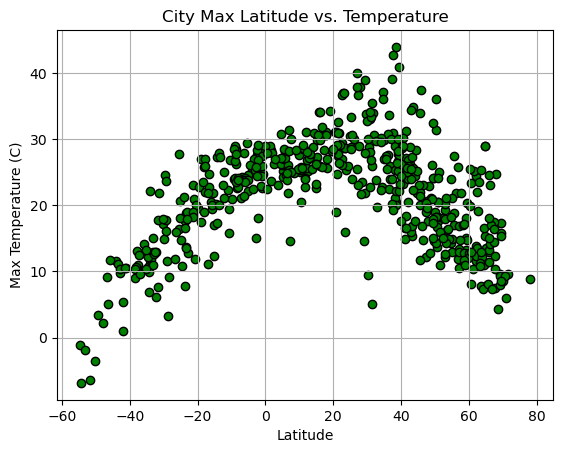

In [182]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"].astype(float)
y_values = city_data_df["Max Temp"].astype(float)

plt.scatter(x_values, y_values, edgecolor = 'black', facecolor = 'green')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

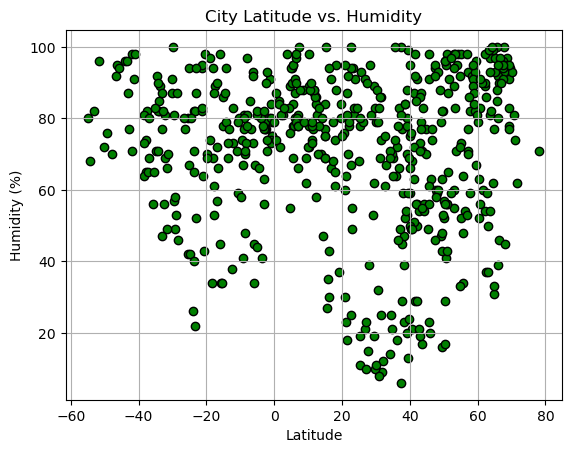

In [183]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype(float)
y_values = city_data_df["Humidity"].astype(float)

plt.scatter(x_values, y_values, edgecolor = 'black', facecolor = 'green')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

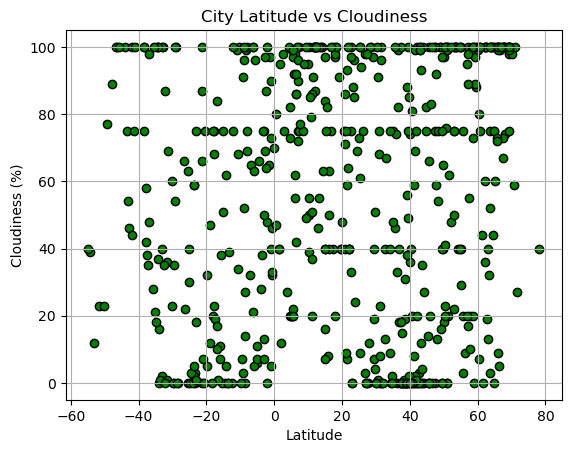

In [184]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype(float)
y_values = city_data_df["Cloudiness"].astype(float)

plt.scatter(x_values, y_values, edgecolor = 'black', facecolor = 'green')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

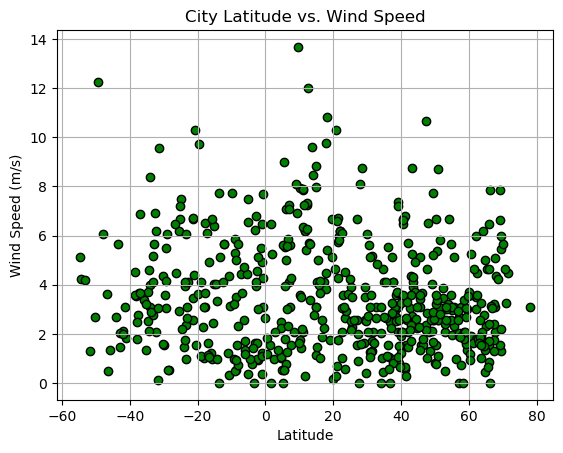

In [185]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"].astype(float)
y_values = city_data_df["Wind Speed"].astype(float)

plt.scatter(x_values, y_values, edgecolor = 'black', facecolor = 'green')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [2]:
# Define a function to create Linear Regression plots
def regression_line(x_values, y_values, slope, intercept, xlabel, ylabel, title, location):
    plt.scatter(x_values, y_values, marker='o', facecolors= 'green', alpha=0.75)
    plt.plot(x_values, result.intercept + result.slope*x_values, 'r')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    
    line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    plt.annotate(line_eq, xy = location, color='red', fontsize=12)
    
    print(f"The r-value is: {r}")
    print(f"The r-squared value is: {r**2}")
    
    plt.show

In [187]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kiruna,67.8557,20.2251,7.51,100,100,2.06,SE,1690068692
1,carloforte,39.1450,8.3058,26.64,80,56,7.38,IT,1690068692
2,ribeira grande,38.5167,-28.7000,20.43,84,19,2.68,PT,1690068692
5,ha'il,27.5219,41.6907,29.01,15,0,0.00,SA,1690068450
6,thompson,55.7435,-97.8558,17.09,48,75,5.14,CA,1690068693


In [188]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,11.57,96,100,2.68,NZ,1690068692
4,port elizabeth,-33.9180,25.5701,11.16,82,0,3.09,ZA,1690068692
8,antofagasta,-23.6500,-70.4000,17.60,82,59,3.94,CL,1690068478
9,bredasdorp,-34.5322,20.0403,10.67,92,100,2.51,ZA,1690068693
10,puerto natales,-51.7236,-72.4875,-6.41,96,23,1.28,CL,1690068693


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6206729059502679


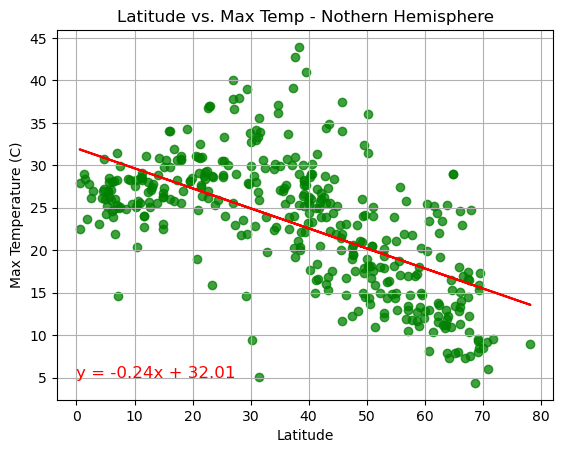

In [200]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype(float)
y_values = northern_hemi_df["Max Temp"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Max Temperature (C)', 'Latitude vs. Max Temp - Nothern Hemisphere', (0,5))


The r-value is: 0.8518464823073799


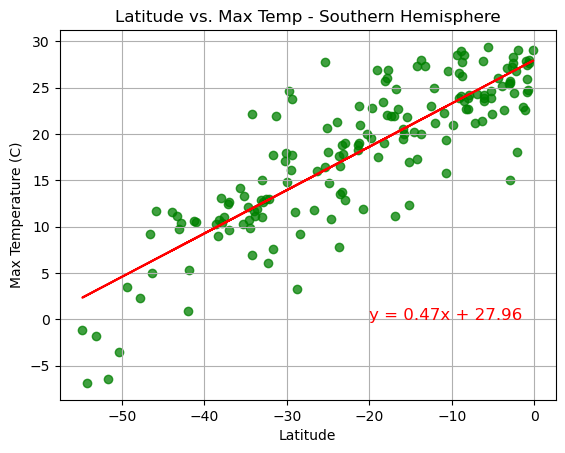

In [199]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype(float)
y_values = southern_hemi_df["Max Temp"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Max Temperature (C)', 'Latitude vs. Max Temp - Southern Hemisphere', (-20,0))


**Discussion about the linear relationship:** 
Based on the data in the scatter plot, we can see that generally maximum temperatures are higher the closer the city is to the equator, or latitude 0. There is a strong correlation between the maximum temperature and latitude in the southern hemisphere, as we see an R squared value of 0.726 for the current dataset. This is stronger evidence of the correlation than that of the northern hemisphere which as an R squared value of 0.385 for the current dataset. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.012611761853718324


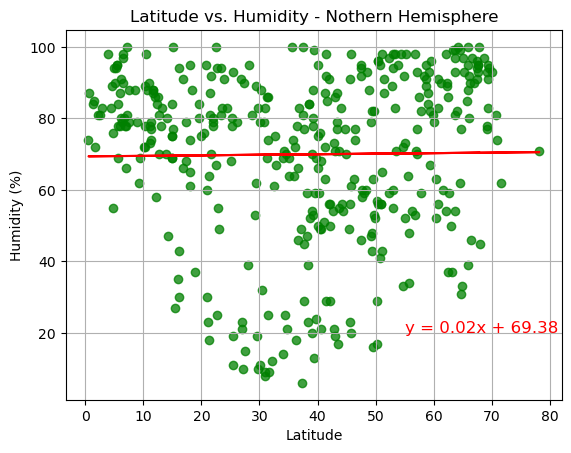

In [191]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype(float)
y_values = northern_hemi_df["Humidity"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Humidity (%)', 'Latitude vs. Humidity - Nothern Hemisphere', (55,20))


The r-value is: -0.12137404768093604


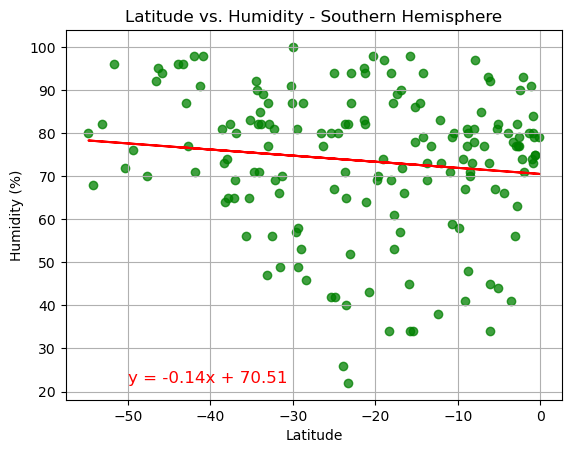

In [192]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype(float)
y_values = southern_hemi_df["Humidity"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Humidity (%)', 'Latitude vs. Humidity - Southern Hemisphere', (-50,22))


**Discussion about the linear relationship:** Based on the data in the scatter plot, we can see that there is not a strong correlation between the latitude of a city and it's humidity levels. The northern hemisphere has an r-squared value of 0.0002, inidicating that only 0.02% of the cities in the dataset have a humidity level that is explained by it's latitude. The southern hemisphere shows a similar story, with an r-squared value of 0.015. This indicates that only 1.5% of the southern hemisphere cities in the dataset have a humidity level that is explained by it's latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02530055431437478


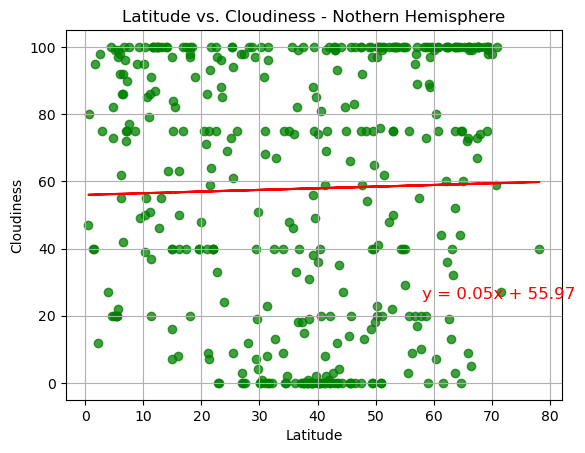

In [193]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype(float)
y_values = northern_hemi_df["Cloudiness"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Cloudiness', 'Latitude vs. Cloudiness - Nothern Hemisphere', (58,25))


The r-value is: -0.057732684668626966


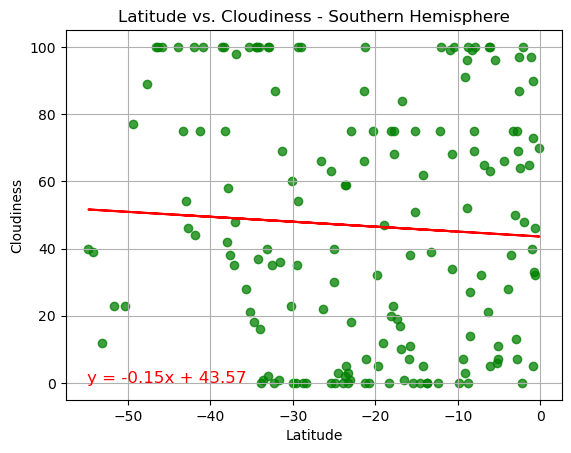

In [194]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype(float)
y_values = southern_hemi_df["Cloudiness"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Cloudiness', 'Latitude vs. Cloudiness - Southern Hemisphere', (-55, 0))


**Discussion about the linear relationship:** Based on the data shown in the scatterplot and the linear regression model created from that data, we can see that there is not a strong correlation between the cloudiness of a city and it's latitude. Essentially what this means is that given the latitude of a city, we cannot confidently say whether the city has a high liklihood of being cloudy or not. The r-value for the northern hemisphere of this dataset is 0.0253, and the r-value for the southern hemisphere of this dataset is -0.0577. While the calculated r-values show a low correlation, we can see that many cities across both hemispheres may have either 0% clouds or 100% clouds, while not being influenced by it's latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.18074678453460388


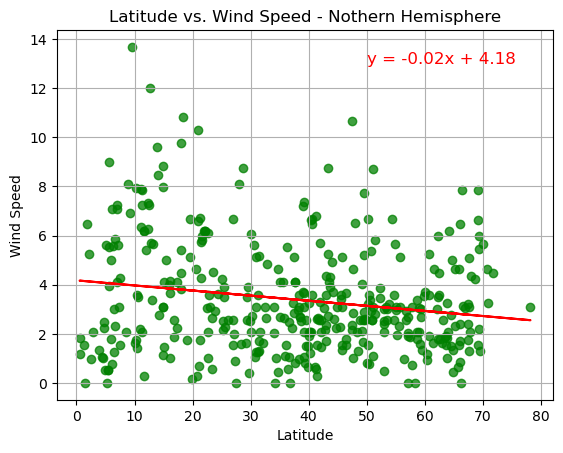

In [195]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype(float)
y_values = northern_hemi_df["Wind Speed"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Wind Speed', 'Latitude vs. Wind Speed - Nothern Hemisphere', (50,13))


The r-value is: -0.07928506228745602


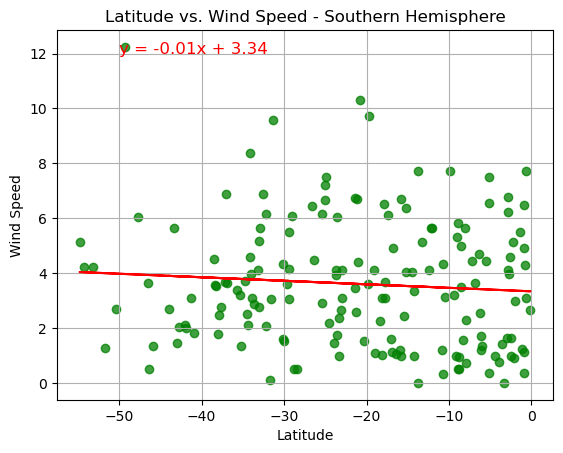

In [196]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype(float)
y_values = southern_hemi_df["Wind Speed"].astype(float)

slope, intercept, r, p, se = linregress(x_values, y_values)
result = linregress(x_values, y_values)

regression_line(x_values, y_values, slope, intercept, 'Latitude', 'Wind Speed', 'Latitude vs. Wind Speed - Southern Hemisphere', (-50, 12))


**Discussion about the linear relationship:** Based on the data shown in the scatterplot and the linear regression model created from that data, we can see that there is not a strong correlation between the average wind speed of a city and it's latitude. Cities in the dataset located in the northern hemisphere have a slightly stronger correlation between their latitude and average wind speed than those in the southern hemisphere. The data provided does not suggest a reason for this, however the differences in their r-values are small. The northern hemisphere has an r-value of -0.1807 and the southern hemisphere has an r-value of -0.0793. Both are very close to 0, telling us there is a weak correlation between the values.